In [1]:
import numpy as np
from statistics import mean
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn import datasets
import mpl_toolkits
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.formula.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')


In [2]:
#importing data
data= pd.read_csv('/Users/reffer/Desktop/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
#drop null columns
data.columns[data.isnull().any()]

Index(['waterfront', 'view', 'yr_renovated'], dtype='object')

In [7]:
data = data.drop('waterfront', axis='columns')

In [8]:
data = data.drop('view', axis='columns')

In [9]:
data = data.drop('date', axis='columns')

In [10]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   17755 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

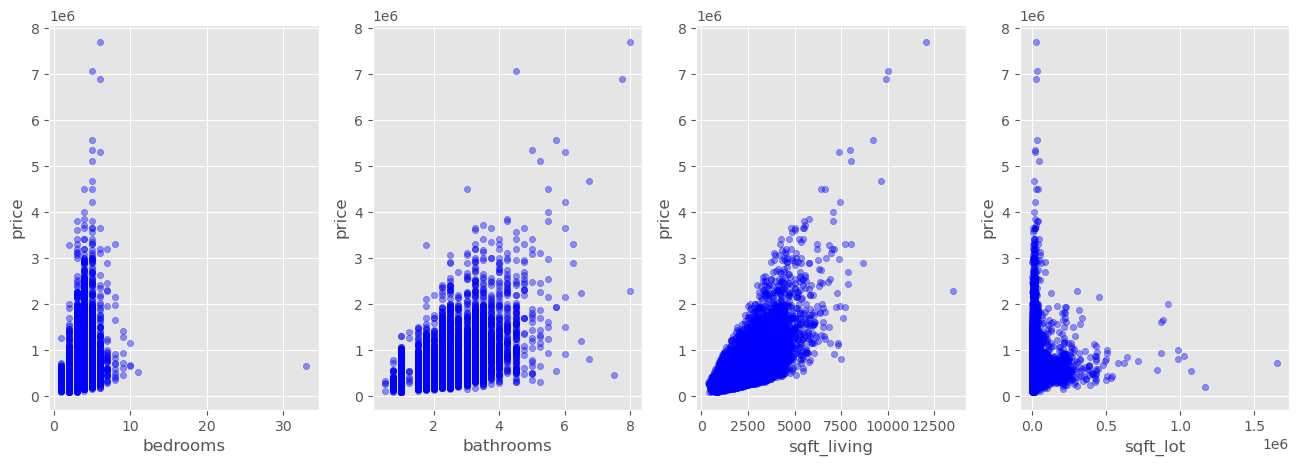

In [12]:
#scatter plot to find the categorical variables
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,5))
for xcol, ax in zip(['bedrooms','bathrooms', 'sqft_living', 'sqft_lot'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')


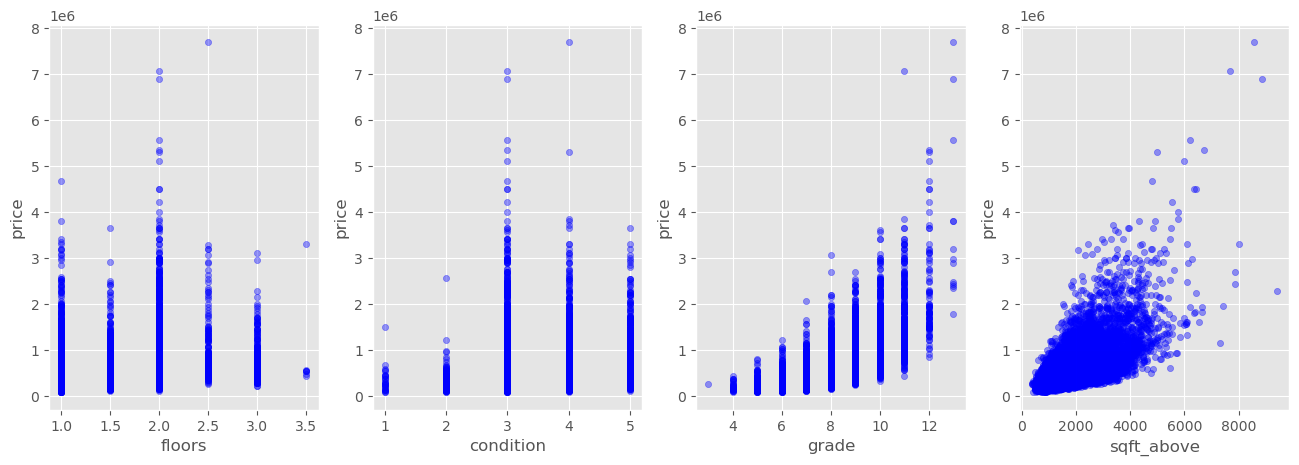

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,5))
for xcol, ax in zip(['floors', 'condition', 'grade', 'sqft_above'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')


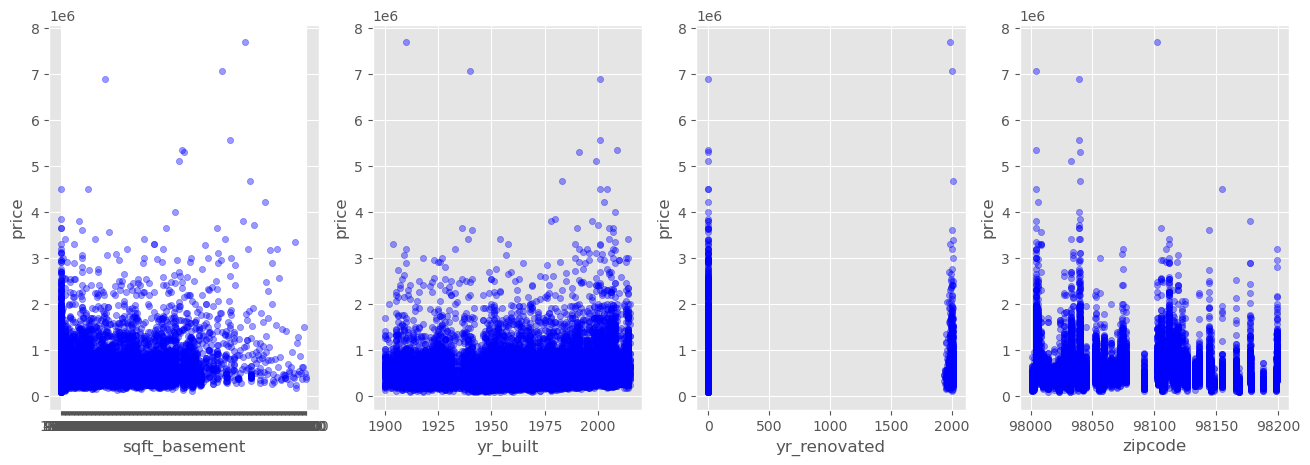

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,5))
for xcol, ax in zip(['sqft_basement', 'yr_built', 'yr_renovated','zipcode'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')


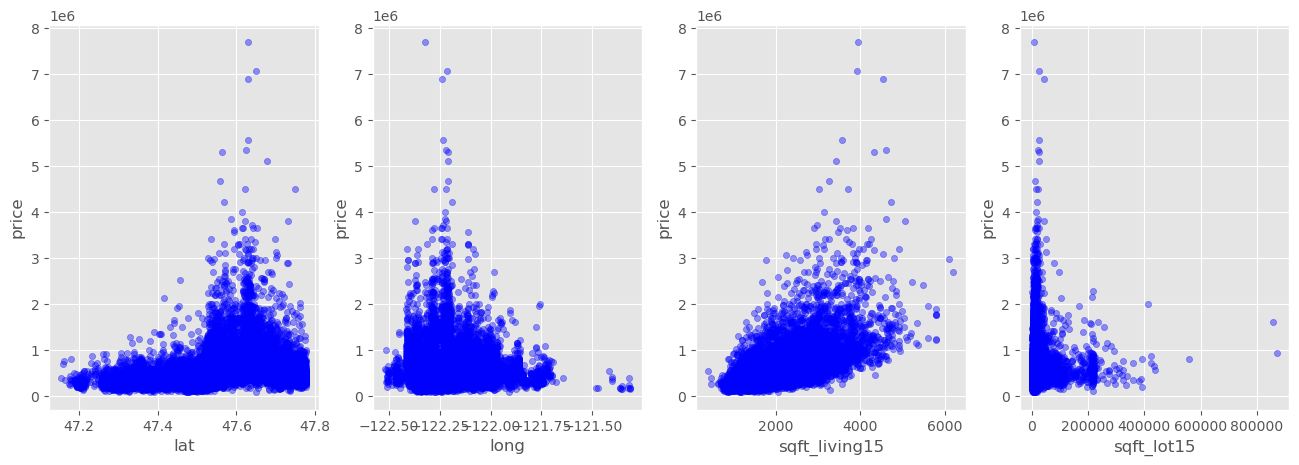

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,5))
for xcol, ax in zip(['lat', 'long', 'sqft_living15', 'sqft_lot15'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')


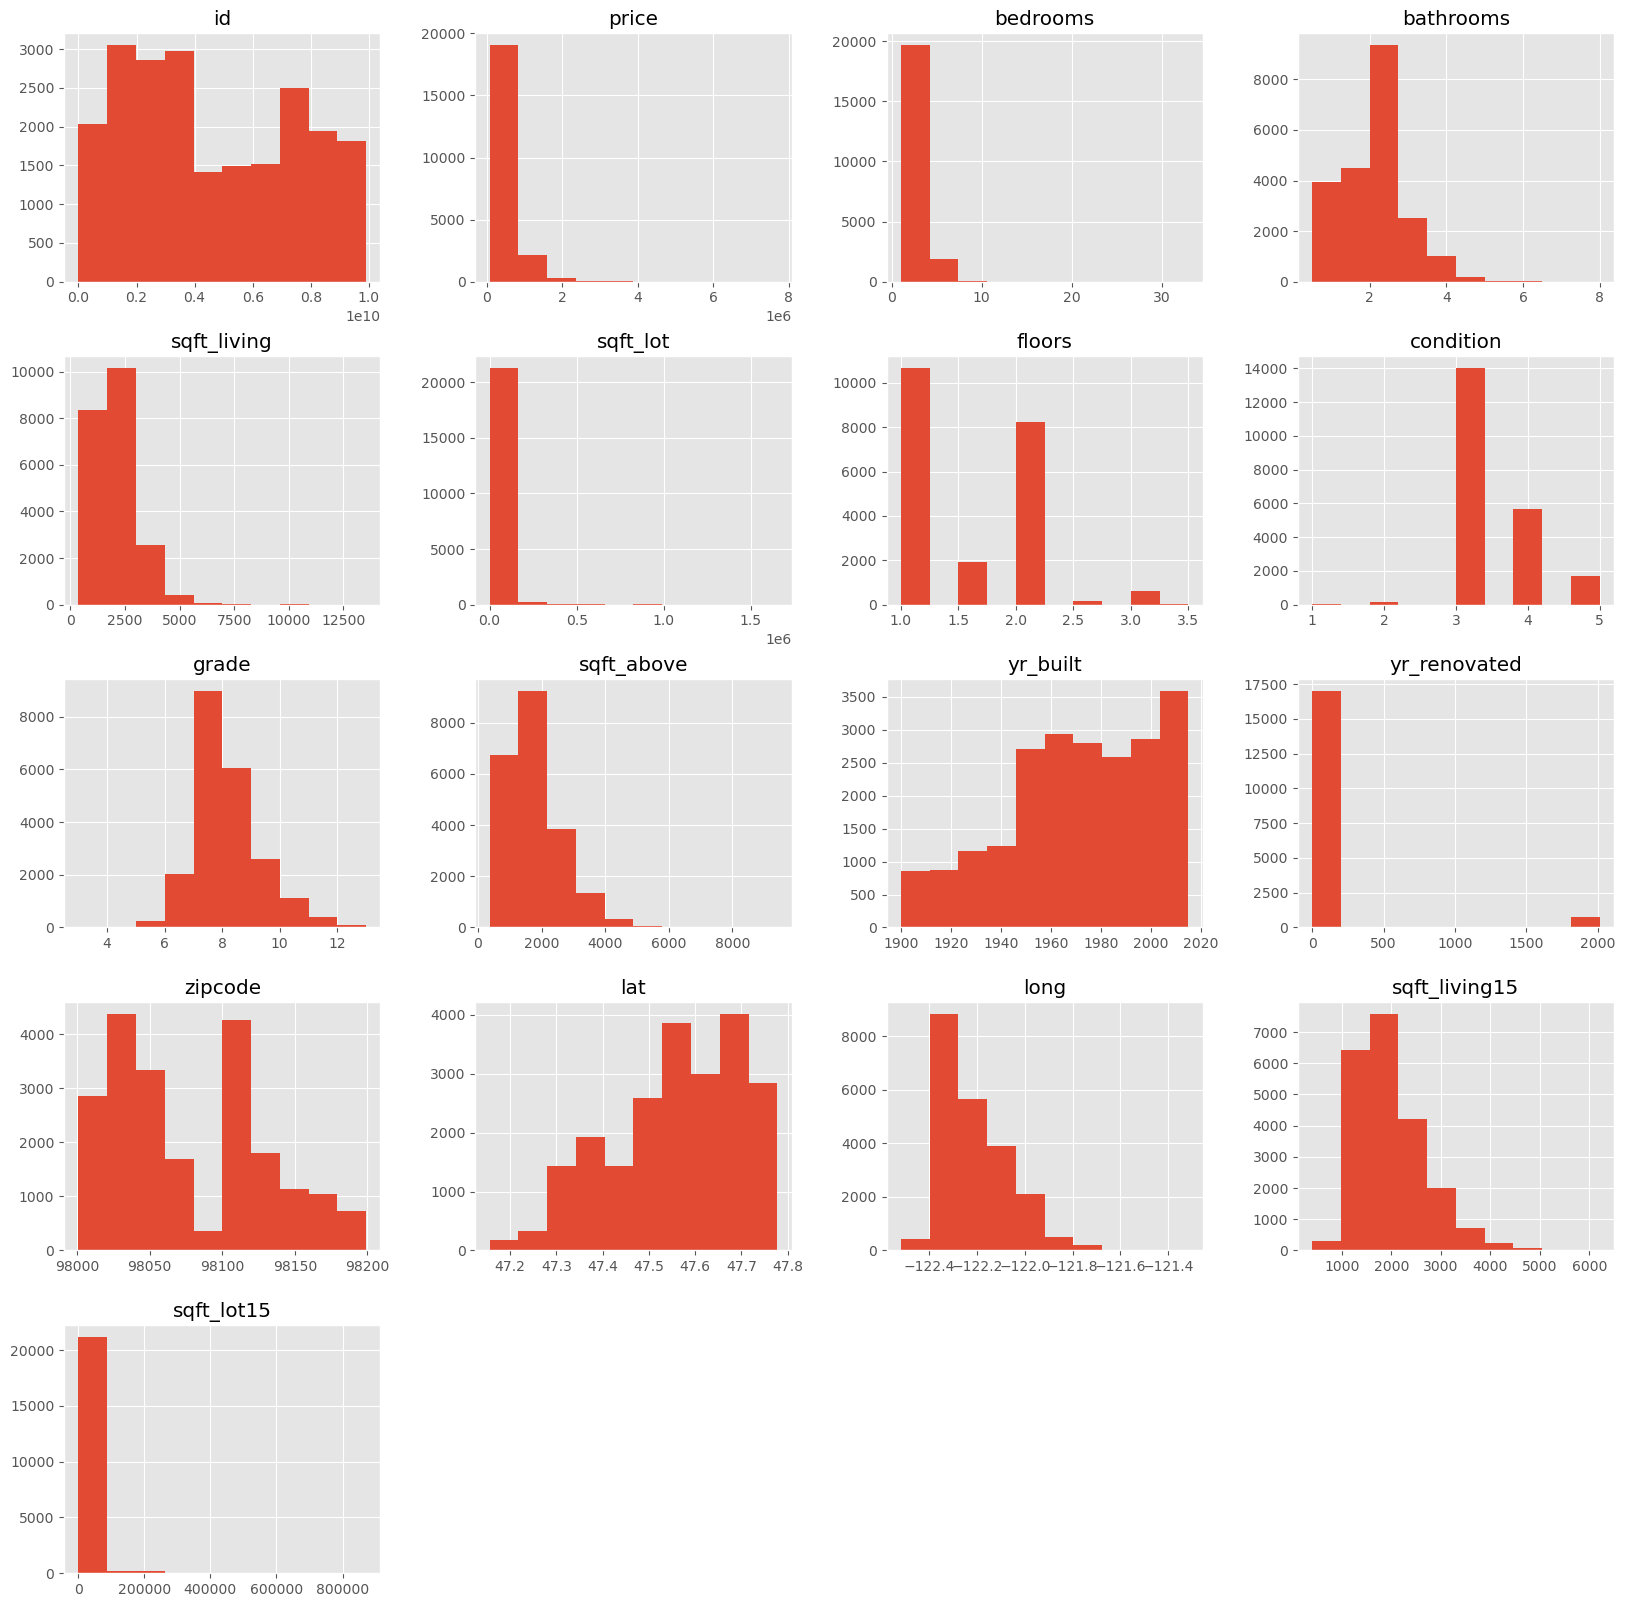

In [16]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
data.hist(ax = ax);

In [17]:
x = data[['bedrooms','bathrooms','sqft_living','sqft_above','grade', 'sqft_lot']]#.values
y = data['price']#.values

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(x_train,y_train)

LinearRegression()

In [23]:
print(lm.intercept_)

-532116.786881626


In [24]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-40203.145130
bathrooms,-29152.324015
sqft_living,281.172141
sqft_above,-78.834224
grade,108076.624752
sqft_lot,-0.199323


In [25]:
pred = lm.predict(x_test)
pred

array([540376.19279223, 501947.48690519, 207065.25055631, ...,
       464924.25205338, 330885.60192443, 424496.65589592])

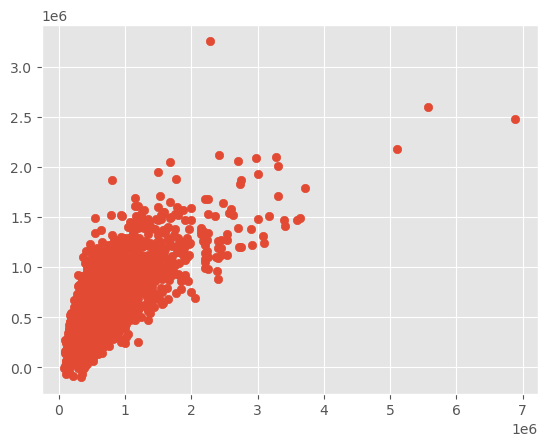

In [26]:
plt.scatter(y_test,pred)

In [27]:
from statsmodels.formula.api import ols
outcome = 'price'
x_cols = ['sqft_above', 'sqft_living', 'grade', 'sqft_living15', 'bathrooms']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     5161.
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:56:25   Log-Likelihood:            -2.9890e+05
No. Observations:               21597   AIC:                         5.978e+05
Df Residuals:                   21591   BIC:                         5.979e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -6.52e+05   1.36e+04    -48.079      0.000   -6.79e+05   -6.25e+05
sqft_above      -80.6961      4.458    -18.101      0.000     -89.434     -71.958
sqft_living     245.5631      4.528     54.238      0.000     236.689     254.437
grade          1.119e+05   2470.776     45.293      0.000    1.07e+05    1.17e+05
sqft_living15    22.2598      4.032      5.520      0.000      14.356      30.164
bathrooms     -3.567e+04   3440.363    -10.369      0.000   -4.24e+04   -2.89e+04
==============================================================================
Omnibus:                    17251.912   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1128620.760
Skew:                           3.361   Prob(JB):                         0.00
Kurtosis:                      37.771   Cond. No.                     2.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
#chech the number of unique values
data[['bedrooms', 'bathrooms', 'floors', 'condition','grade', 'yr_built','yr_renovated','zipcode']].nunique()

bedrooms         12
bathrooms        29
floors            6
condition         5
grade            11
yr_built        116
yr_renovated     70
zipcode          70
dtype: int64

In [29]:
#transforming categorical variables 
data['new_bedrooms'] = np.where(data['bedrooms']>3,'Y','N')
xbd= pd.get_dummies(data.new_bedrooms, prefix='new_bedrooms')
xbd 

,new_bedrooms_N,new_bedrooms_Y
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
21592,1,0
21593,0,1
21594,1,0
21595,1,0


In [30]:
data['new_bathrooms'] = np.where(data['bathrooms']>3,'Y','N')
xbt= pd.get_dummies(data.new_bathrooms, prefix='new_bathrooms')
xbt


,new_bathrooms_N,new_bathrooms_Y
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
21592,1,0
21593,1,0
21594,1,0
21595,1,0


In [31]:
data['new_yrbuilt'] = np.where(data['yr_built']>1990,'Y','N')
xyb= pd.get_dummies(data.new_yrbuilt, prefix='new_yrbuilt')
xyb

,new_yrbuilt_N,new_yrbuilt_Y
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
21592,0,1
21593,0,1
21594,0,1
21595,0,1


In [32]:
data['nyr_renovated'] = np.where(data['yr_renovated']>1990,'Y','N')
xrn= pd.get_dummies(data.nyr_renovated, prefix='nyr_renovated')
xrn 

,nyr_renovated_N,nyr_renovated_Y
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
21592,1,0
21593,1,0
21594,1,0
21595,1,0


In [33]:
#change 'bedrooms', bathrooms', 'yr_built and 'yr_renovated' columns over to dummies and drop the first variable.
xbd_dummies = pd.get_dummies(data['bedrooms'], prefix='bed', drop_first=True)
xbt_dummies = pd.get_dummies(data['bathrooms'], prefix='bat', drop_first=True)
xyb_dummies = pd.get_dummies(data['yr_built'], prefix='blt', drop_first=True)
xrn_dummies = pd.get_dummies(data['yr_renovated'], prefix='rnv', drop_first=True)

In [34]:
#Remove the original columns from the data and add the dummy columns instead
data = data.drop(['bedrooms','bathrooms','yr_built','yr_renovated'], axis=1)

In [35]:
data = pd.concat([data, xbd_dummies, xbt_dummies, xyb_dummies, xrn_dummies], axis=1)
data.head()

,id,price,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,zipcode,...,rnv_2006.0,rnv_2007.0,rnv_2008.0,rnv_2009.0,rnv_2010.0,rnv_2011.0,rnv_2012.0,rnv_2013.0,rnv_2014.0,rnv_2015.0
0,7129300520,221900.0,1180,5650,1.0,3,7,1180,0.0,98178,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,2570,7242,2.0,3,7,2170,400.0,98125,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,770,10000,1.0,3,6,770,0.0,98028,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,1960,5000,1.0,5,7,1050,910.0,98136,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000.0,1680,8080,1.0,3,8,1680,0.0,98074,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#Database predictor
data_pred = data.iloc[:,1:21]
data_pred.head()

,price,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,new_bedrooms,new_bathrooms,new_yrbuilt,nyr_renovated,bed_2,bed_3,bed_4
0,221900.0,1180,5650,1.0,3,7,1180,0.0,98178,47.5112,-122.257,1340,5650,N,N,N,N,0,1,0
1,538000.0,2570,7242,2.0,3,7,2170,400.0,98125,47.7210,-122.319,1690,7639,N,N,N,Y,0,1,0
2,180000.0,770,10000,1.0,3,6,770,0.0,98028,47.7379,-122.233,2720,8062,N,N,N,N,1,0,0
3,604000.0,1960,5000,1.0,5,7,1050,910.0,98136,47.5208,-122.393,1360,5000,Y,N,N,N,0,0,1
4,510000.0,1680,8080,1.0,3,8,1680,0.0,98074,47.6168,-122.045,1800,7503,N,N,N,N,0,1,0


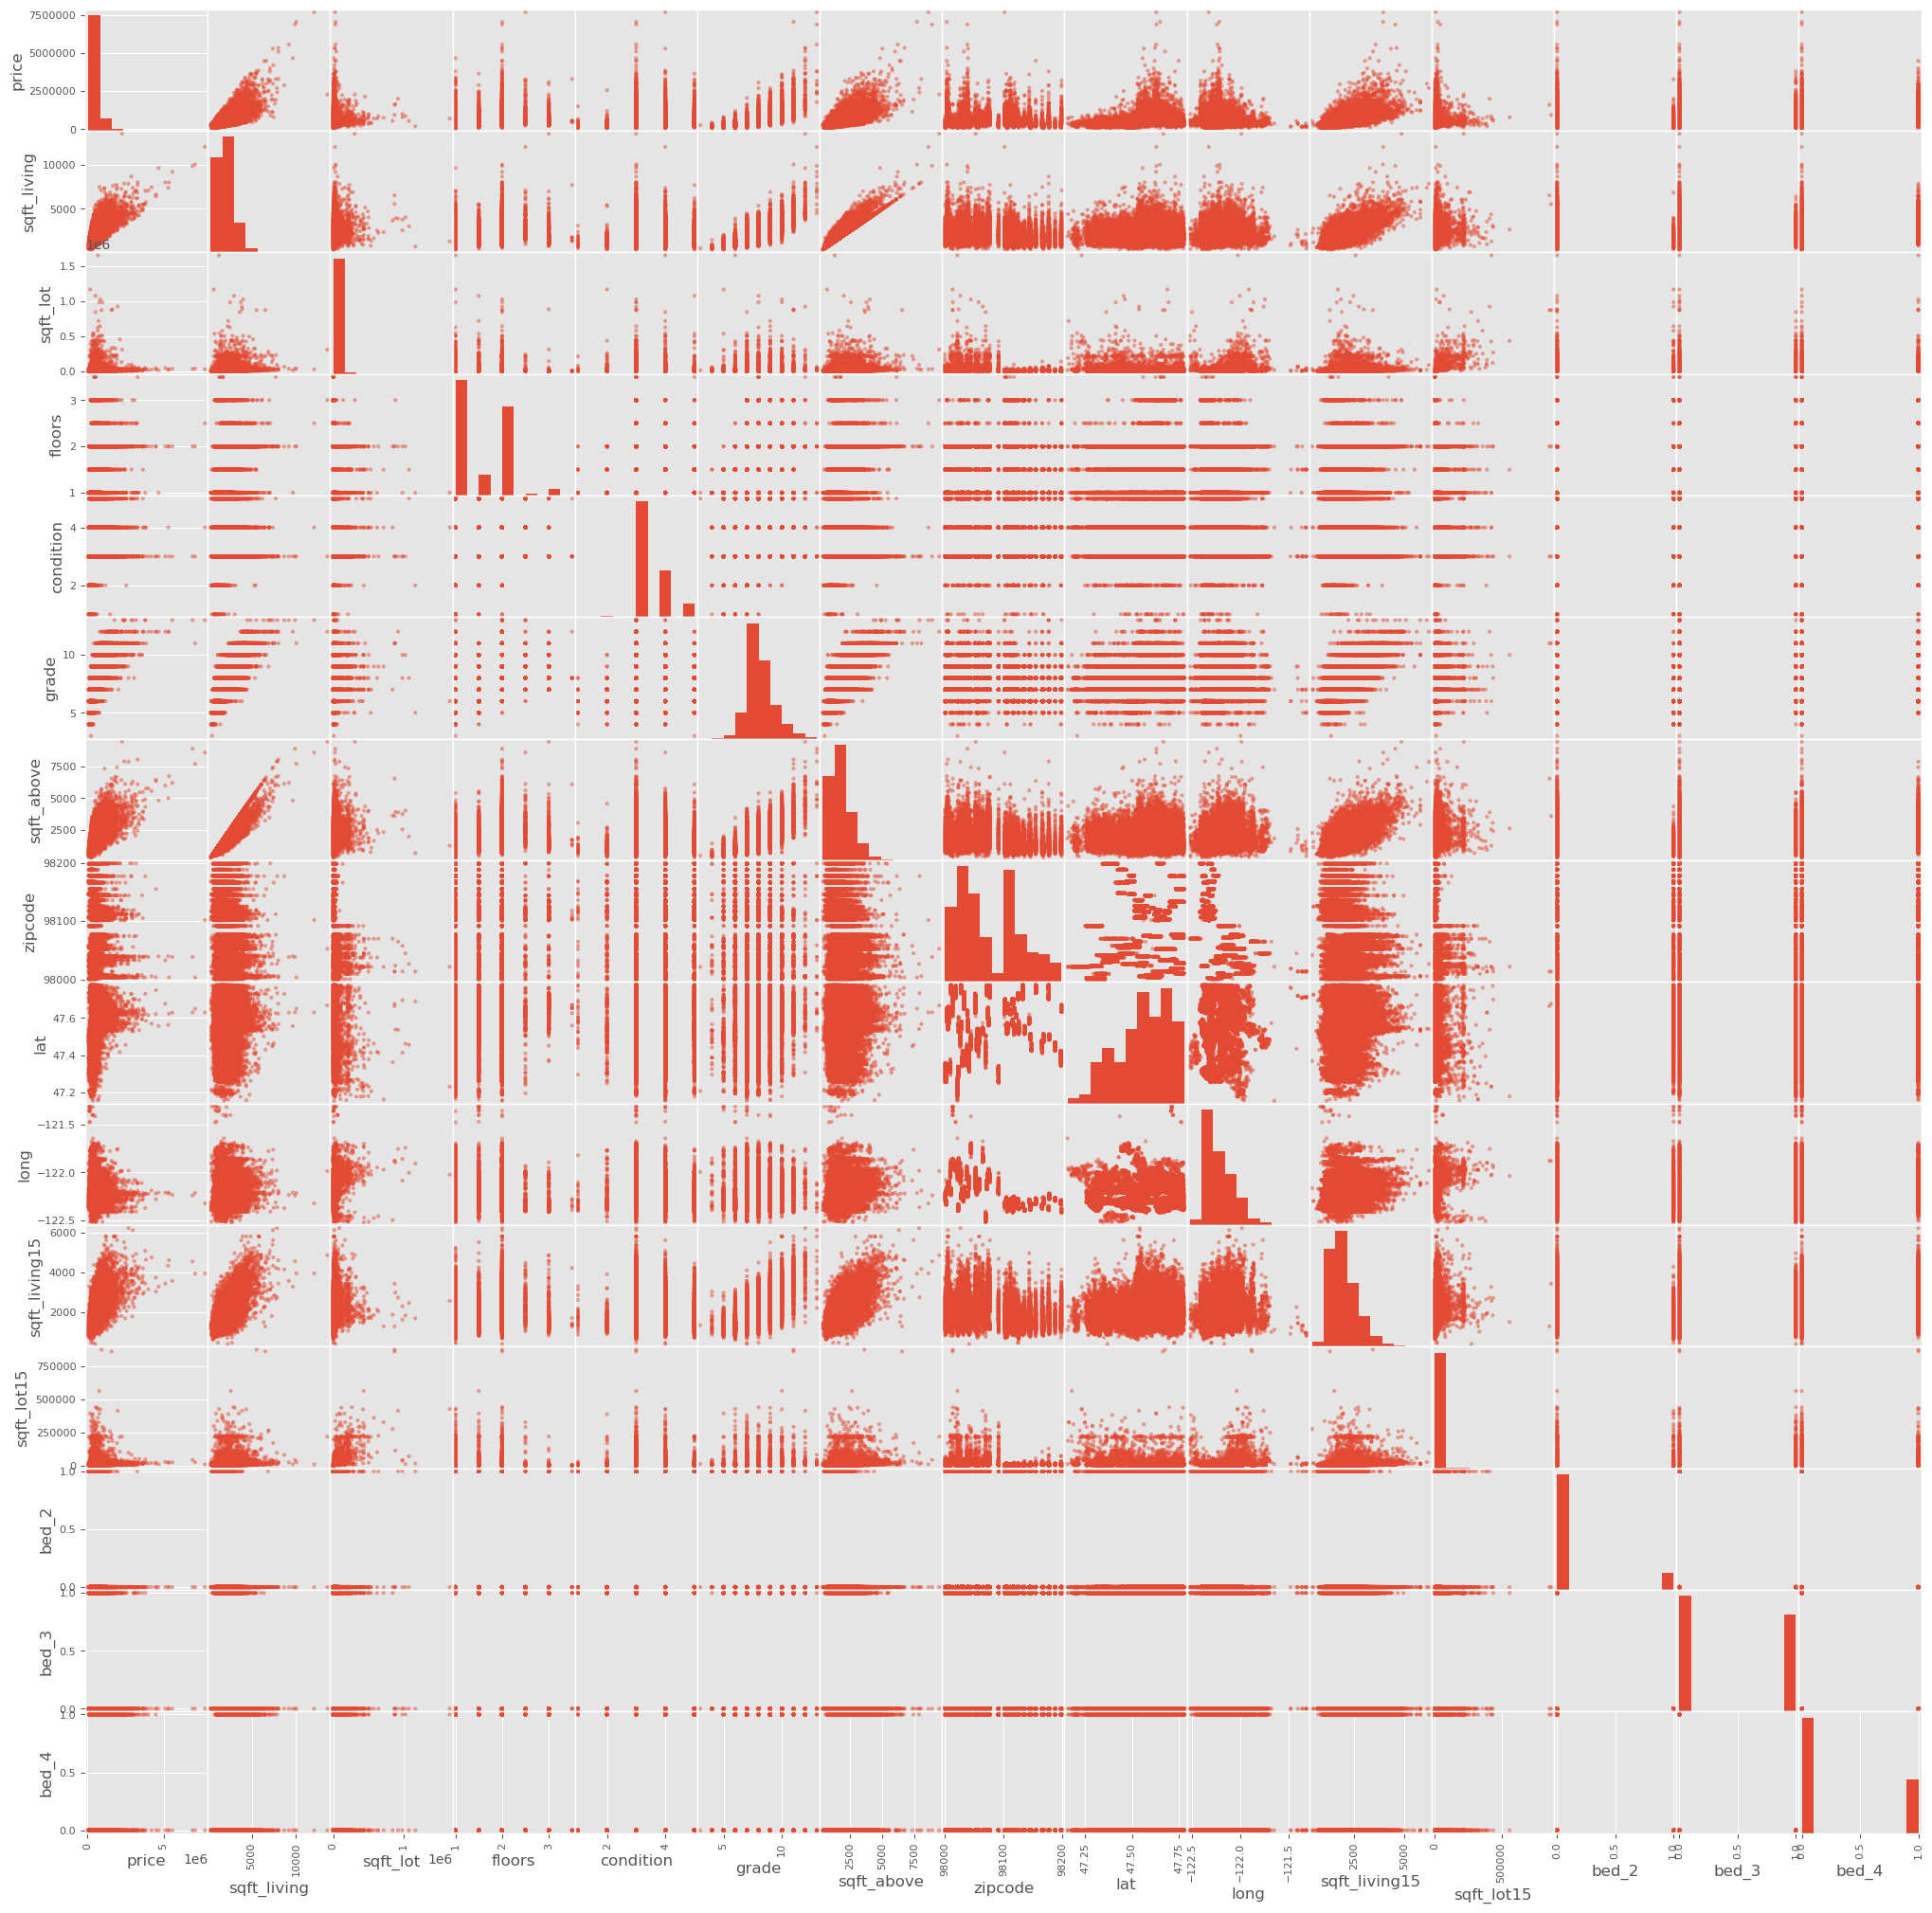

In [37]:
#scatter plot predictor
pd.plotting.scatter_matrix(data_pred,figsize  = [25, 25]);
plt.show()

In [38]:
#correlation
data_pred.corr()

,price,sqft_living,sqft_lot,floors,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,bed_2,bed_3,bed_4
price,1.000000,0.701917,0.089876,0.256804,0.036056,0.667951,0.605368,-0.053402,0.306692,0.022036,0.585241,0.082845,-0.144740,-0.184059,0.177351
sqft_living,0.701917,1.000000,0.173453,0.353953,-0.059445,0.762779,0.876448,-0.199802,0.052155,0.241214,0.756402,0.184342,-0.350461,-0.273109,0.353324
sqft_lot,0.089876,0.173453,1.000000,-0.004814,-0.008830,0.114731,0.184139,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.027755,-0.015102,0.026776
floors,0.256804,0.353953,-0.004814,1.000000,-0.264075,0.458794,0.523989,-0.059541,0.049239,0.125943,0.280102,-0.010722,-0.132915,-0.075640,0.154604
condition,0.036056,-0.059445,-0.008830,-0.264075,1.000000,-0.146896,-0.158904,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,-0.018786,0.007987,-0.003425
grade,0.667951,0.762779,0.114731,0.458794,-0.146896,1.000000,0.756073,-0.185771,0.113575,0.200341,0.713867,0.120981,-0.256511,-0.144360,0.267428
sqft_above,0.605368,0.876448,0.184139,0.523989,-0.158904,0.756073,1.000000,-0.261570,-0.001199,0.344842,0.731767,0.195077,-0.315086,-0.225302,0.338496
zipcode,-0.053402,-0.199802,-0.129586,-0.059541,0.002888,-0.185771,-0.261570,1.000000,0.266742,-0.564259,-0.279299,-0.147294,0.200302,-0.025156,-0.104829
lat,0.306692,0.052155,-0.085514,0.049239,-0.015102,0.113575,-0.001199,0.266742,1.000000,-0.135371,0.048679,-0.086139,0.078760,-0.056797,-0.019620
long,0.022036,0.241214,0.230227,0.125943,-0.105877,0.200341,0.344842,-0.564259,-0.135371,1.000000,0.335626,0.255586,-0.175687,0.004143,0.120737


In [39]:
abs(data_pred.corr()) > 0.75

,price,sqft_living,sqft_lot,floors,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,bed_2,bed_3,bed_4
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False
sqft_lot,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False
sqft_above,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False
zipcode,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
lat,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
long,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [40]:
#Checking how much are correlated the variables
data=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)
data['pairs'] = list(zip(data.level_0, data.level_1))
data.set_index(['pairs'], inplace = True)
data.drop(columns=['level_1', 'level_0'], inplace = True)
data.columns = ['cc']
data.drop_duplicates(inplace=True)
data

,cc
pairs,
"(price, price)",1.000000
"(sqft_living, sqft_above)",0.876448
"(grade, sqft_living)",0.762779
"(sqft_living15, sqft_living)",0.756402
"(grade, sqft_above)",0.756073
...,...
"(condition, bed_4)",0.003425
"(condition, sqft_lot15)",0.003126
"(zipcode, condition)",0.002888


In [41]:
data[(data.cc>.75) & (data.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(grade, sqft_living)",0.762779
"(sqft_living15, sqft_living)",0.756402
"(grade, sqft_above)",0.756073


<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

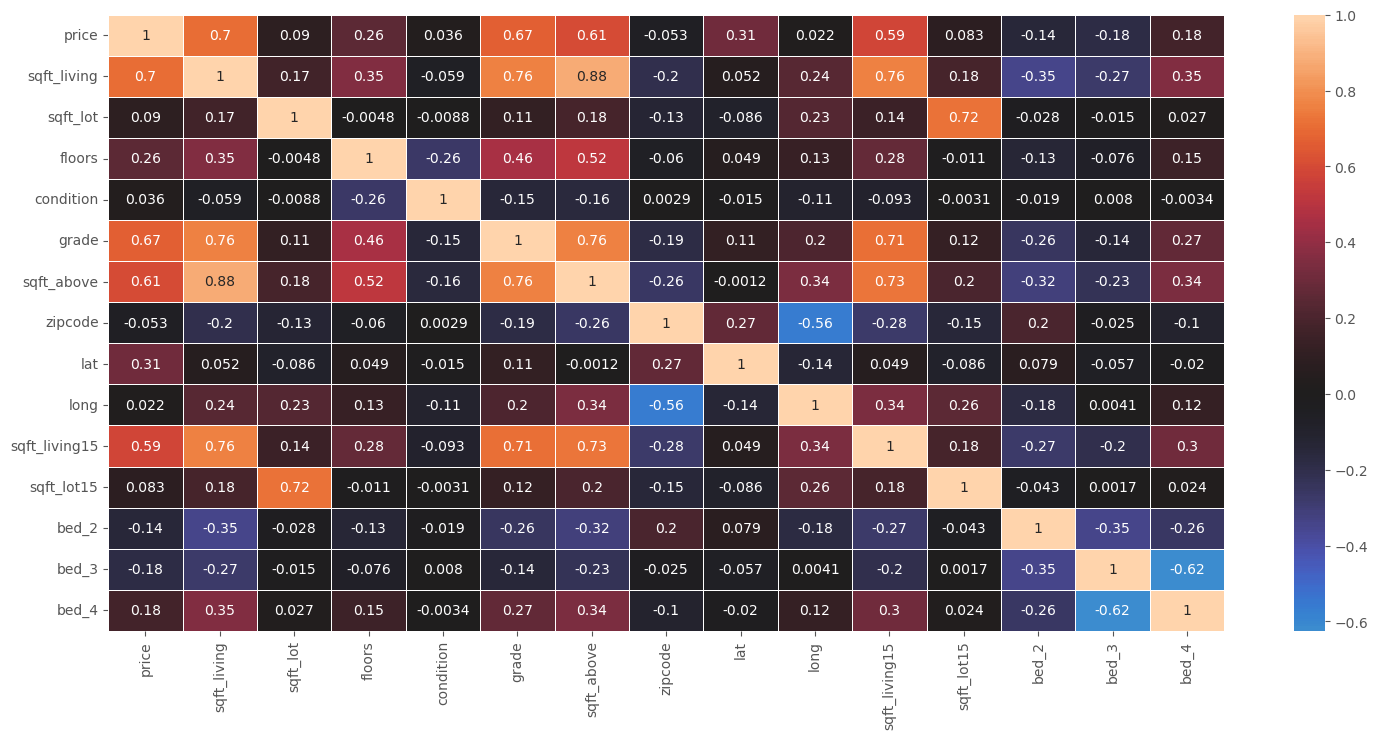

In [42]:
#correlation plot
#corr = data.corr()  
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(data=data_pred.corr(), linewidths=0.5, center=0, annot=True, ax=ax)
sns.heatmap

In [43]:
x = data[['bedrooms','bathrooms','sqft_living','sqft_above','grade', 'sqft_lot']].values
y = data['price'].values

KeyError: "None of [Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'grade',\n       'sqft_lot'],\n      dtype='object')] are in the [columns]"

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(x_train,y_train)

In [ ]:
rint(lm.intercept_)

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

In [ ]:
data= pd.read_csv('/Users/reffer/Desktop/kc_house_data.csv')
data.head()

In [ ]:
from statsmodels.formula.api import ols
outcome = 'price'
x_cols = ['sqft_above', 'sqft_living', 'grade', 'sqft_living15', 'bathrooms']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

In [ ]:
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

In [ ]:
#Logarithmic Functions
x = np.linspace(start=-100, stop=100, num=10**3)
y = np.log(x)
plt.plot(x, y);

In [ ]:
#Non-Normal Features
non_normal = ['sqft_above', 'sqft_living', 'grade', 'sqft_living15', 'bathrooms']
for feat in non_normal:
    data[feat] = data[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

In [6]:
outcome = 'price'
x_cols = ['sqft_above', 'sqft_living', 'grade', 'sqft_living15', 'bathrooms']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

NameError: name 'ols' is not defined

In [7]:
outcome = 'price'
x_cols = ['sqft_above', 'sqft_living', 'grade', 'sqft_living15', 'bathrooms']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary(

SyntaxError: unexpected EOF while parsing (3679433322.py, line 6)